# **DATASET DIGITS WITH K-MEANS AND CLUSTERING**

# Step1: Load the digits dataset from sklearn

In [98]:
# Step 1: Load the digits dataset from sklearn
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import seaborn as sns

# Load the dataset
digits = load_digits()
X = digits.data
y = digits.target
df = pd.DataFrame(X)

# Step2: Understand dataset

In [99]:
# Step 2: Understand the dataset by printing
df.head()
# The digits dataset consists of images represented in a flattened 64-dimensional space (each image is 8x8 pixels).
# Each row corresponds to one image, and each column represents pixel intensity values ranging from 0 to 16.

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


# Step3: Ploting examples of digits

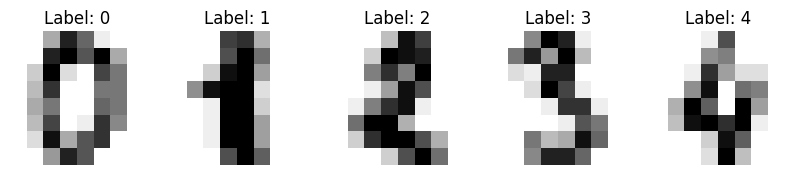

In [100]:
# Step 3: Plot some examples of digits
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Label: {label}')
plt.show()

# Step4: Descriptive statistics

In [101]:
# Step 4: Apply descriptive statistics to the dataset
descriptive_stats = df.describe()
descriptive_stats

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
count,1797.0,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,...,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000,1797.000000
mean,0.0,0.303840,5.204786,11.835838,11.848080,5.781859,1.362270,0.129661,0.005565,1.993879,...,3.725097,0.206455,0.000556,0.279354,5.557596,12.089037,11.809126,6.764051,2.067891,0.364496
std,0.0,0.907192,4.754826,4.248842,4.287388,5.666418,3.325775,1.037383,0.094222,3.196160,...,4.919406,0.984401,0.023590,0.934302,5.103019,4.374694,4.933947,5.900623,4.090548,1.860122
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,1.000000,10.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,11.000000,10.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,4.000000,13.000000,13.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,4.000000,13.000000,14.000000,6.000000,0.000000,0.000000
75%,0.0,0.000000,9.000000,15.000000,15.000000,11.000000,0.000000,0.000000,0.000000,3.000000,...,7.000000,0.000000,0.000000,0.000000,10.000000,16.000000,16.000000,12.000000,2.000000,0.000000
max,0.0,8.000000,16.000000,16.000000,16.000000,16.000000,16.000000,15.000000,2.000000,16.000000,...,16.000000,13.000000,1.000000,9.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000


**These descriptive statistics reveal several insights about the pixel values across the dataset:**
*Mean and Median Values: *Many of the pixel values are close to zero, indicating a lot of black or empty space in
the images. Some pixels near the center or primary stroke areas have higher mean values.

*Range:* Pixel intensities vary from 0 to 16, where 0 represents a white pixel and 16 represents the darkest pixel.

*Variability:* There is a significant standard deviation in some pixel positions, suggesting that certain areas of
the image capture much of the variation between different digits.

# Step5: Visualization

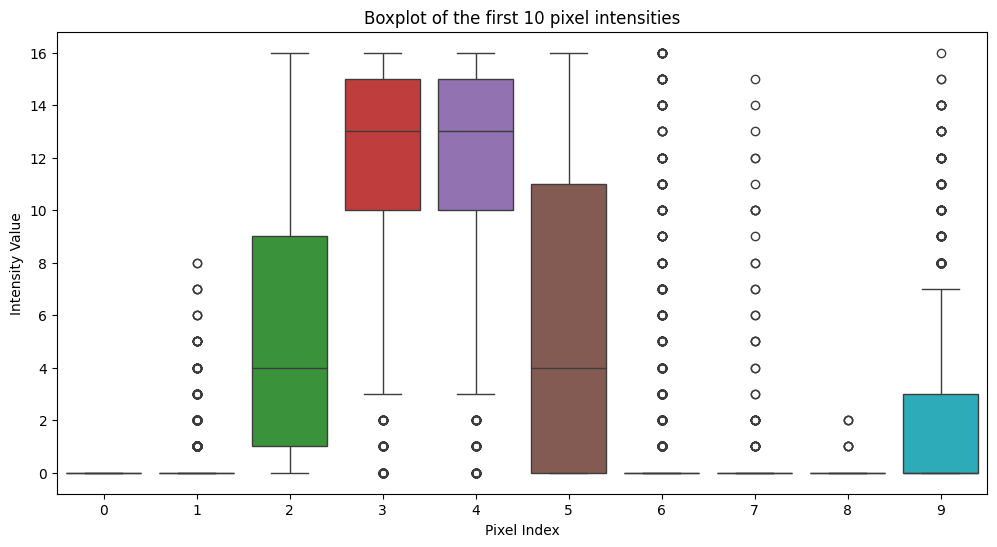

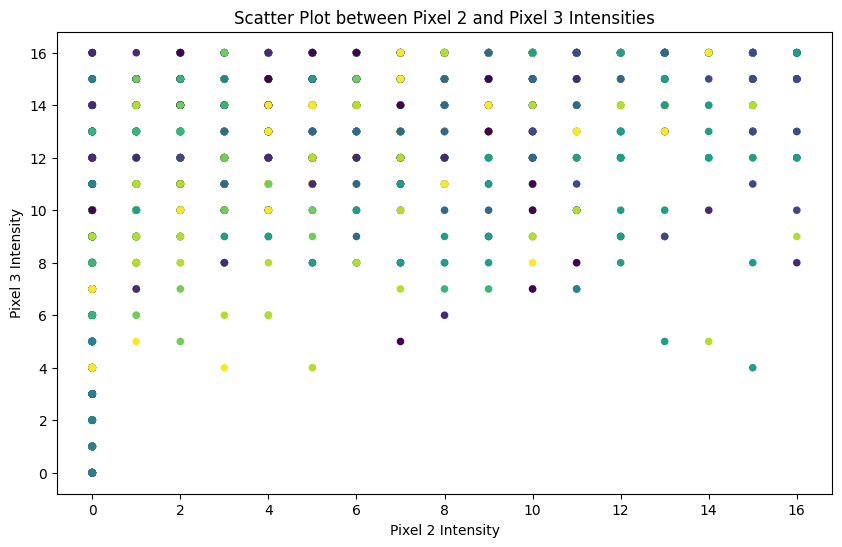

In [102]:
# Step 5: Visualization
# a. Boxplot of some of the variables (selecting first few columns for demonstration)
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.iloc[:, :10])
plt.title('Boxplot of the first 10 pixel intensities')
plt.xlabel('Pixel Index')
plt.ylabel('Intensity Value')
plt.show()

# b. Scatter plot between some variables (choosing arbitrary pairs)
plt.figure(figsize=(10, 6))
plt.scatter(df[2], df[3], c=y, cmap='viridis', s=20)
plt.title('Scatter Plot between Pixel 2 and Pixel 3 Intensities')
plt.xlabel('Pixel 2 Intensity')
plt.ylabel('Pixel 3 Intensity')
plt.show()

**The visualizations provide a closer look at the data:**

*Boxplot:* Shows the spread and variability of pixel intensities in the first 10 columns. Some columns have higher variability, indicating more frequent non-zero values (likely near the digit strokes).


*Scatter Plot:* Demonstrates the relationship between pixel intensities at positions 2 and 3. Different clusters hint
at distinct digit patterns.

# Step6: K-means with all variables

In [103]:
# Step 6: Apply K-means with all variables
# Standardize the data before clustering
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-means clustering
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_scaled)
labels = kmeans.labels_

# Analyzing clustering results by comparing with actual labels
from sklearn.metrics import confusion_matrix, accuracy_score
conf_matrix = confusion_matrix(y, labels)

# Display confusion matrix to analyze the clustering results
conf_matrix_df = pd.DataFrame(conf_matrix, index=range(10), columns=range(10))
conf_matrix_df

# The confusion matrix shows the clustering performance of the K-means algorithm with 10 clusters on the standardized
  #dataset. The results highlight several points:
# There is a clear cluster alignment with some digits (e.g., digit 0 is well-clustered), while others (e.g., digits 1,
  #2, 8) have significant misclassifications, showing overlaps across clusters.
# This suggests that K-means captures some structural features of digits but struggles with variability and similar
  #shapes between certain digits.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,0,1,2,3,4,5,6,7,8,9
0,0,0,176,0,2,0,0,0,0,0
1,107,1,0,27,46,0,0,0,1,0
2,21,0,0,43,3,0,104,1,5,0
3,7,3,0,1,0,0,9,7,156,0
4,1,2,0,0,159,0,0,10,0,9
5,1,137,0,0,2,2,0,0,40,0
6,5,0,1,0,0,175,0,0,0,0
7,0,1,0,0,2,0,7,152,0,17
8,101,7,0,0,3,2,7,4,50,0
9,2,5,0,0,15,0,0,9,145,4


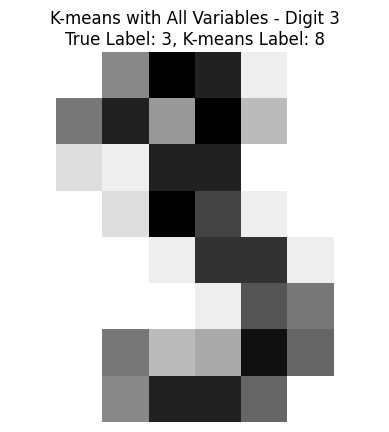

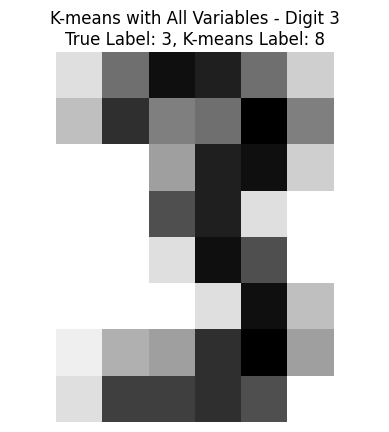

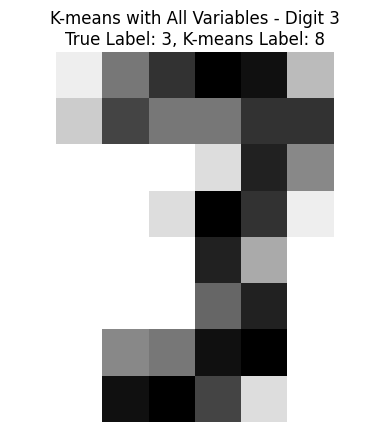

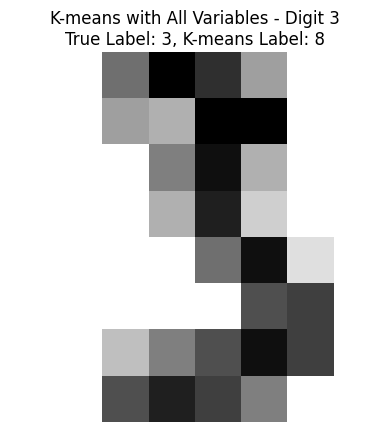

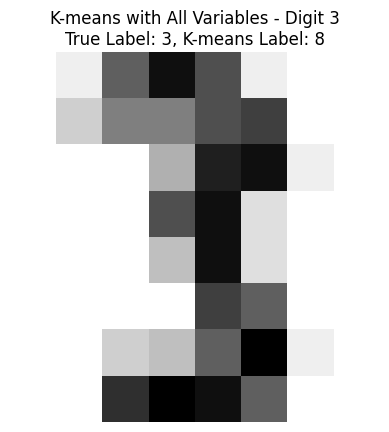

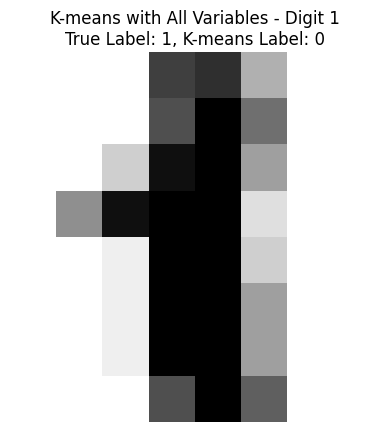

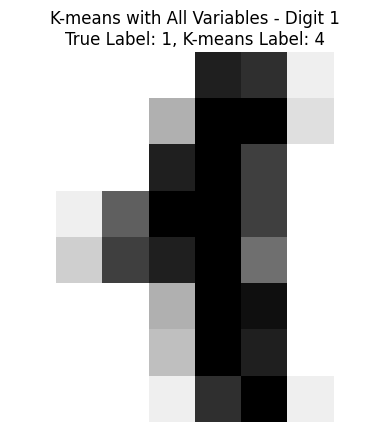

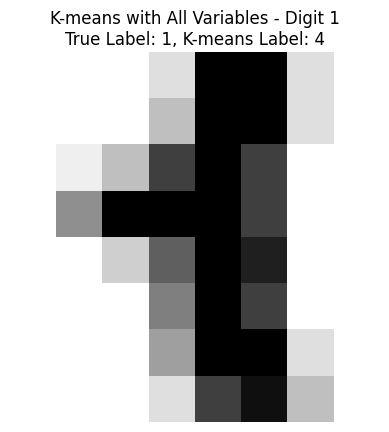

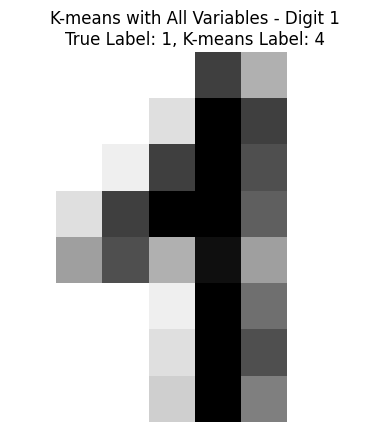

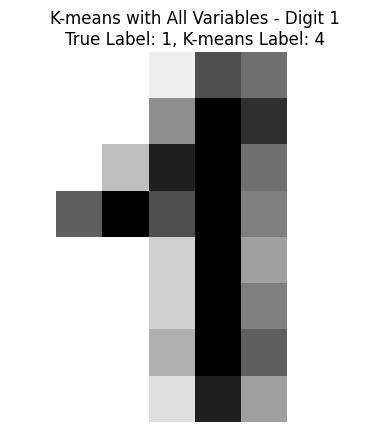

In [104]:
# Function to find multiple indices of a specific digit
def find_indices(label, count):
    indices = np.where(y == label)[0][:count]  # Finding the first 'count' occurrences of the digit
    return indices

# Get 5 indices for digit 3 and digit 1
indices_3 = find_indices(3, 5)
indices_1 = find_indices(1, 5)

# Function to plot multiple examples with original and K-means labels
def plot_multiple_examples(indices, true_digit_label, kmeans_labels, title):
    for index in indices:
        plot_digit_with_labels(digits.images[index], y[index], kmeans_labels[index], title=title)

# Plotting for digit 3 - Step 6 (K-means with All Variables vs Original Label)
plot_multiple_examples(indices_3, 3, labels, title='K-means with All Variables - Digit 3')
# Plotting for digit 1 - Step 6 (K-means with All Variables vs Original Label)
plot_multiple_examples(indices_1, 1, labels, title='K-means with All Variables - Digit 1')

**K-means with All Variables** - *What it Means*: Using all variables means that each data point (digit image) is represented by all 64 pixels (8x8 grid) of the image. This approach captures the complete structure of each digit, including horizontal, vertical, and curved strokes, which are crucial for distinguishing different digits.


*Why It Can Cluster Numbers Correctly:*
By using all 64 pixels, the clustering algorithm has a full view of the digit's shape, patterns, and distinct features.
All variables provide the necessary detail for K-means to distinguish one digit from another based on their unique structural characteristics. Since the algorithm captures the entire image, it can correctly group similar digits even if the assigned cluster number does not correspond to the actual digit label.


*Conclusion:* K-means with all variables tends to group numbers correctly because it has enough data to recognize the overall structure and commonalities among similar digits.

# Step7: K-means with variables of one row (e.g., using the first row of each image)

In [105]:
# Step 7: K-means with variables of one row (e.g., using the first row of each image)
# Extracting the first row of each image
X_first_row = X[:, :8]

# Apply K-means clustering on the first row variables
kmeans_row = KMeans(n_clusters=10, random_state=42)
kmeans_row.fit(X_first_row)
labels_row = kmeans_row.labels_

# Analyzing clustering results by comparing with actual labels
conf_matrix_row = confusion_matrix(y, labels_row)

# Display confusion matrix to analyze clustering by rows
conf_matrix_row_df = pd.DataFrame(conf_matrix_row, index=range(10), columns=range(10))
conf_matrix_row_df
# The confusion matrix for K-means clustering using only the first row of each image shows significant
  #misclassifications, indicating that clustering based solely on the first row is not effective.
  #Many digits are scattered across multiple clusters, revealing that a single row does not capture enough distinctive
  #features.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,0,1,2,3,4,5,6,7,8,9
0,85,0,34,13,4,15,1,9,0,17
1,50,1,20,20,12,8,1,14,50,6
2,18,0,11,6,0,23,2,56,8,53
3,13,5,1,24,5,60,29,4,0,42
4,18,0,42,0,107,0,0,2,12,0
5,5,29,2,20,0,23,88,6,0,9
6,53,0,72,9,43,0,0,3,1,0
7,15,61,1,45,0,17,14,4,5,17
8,46,0,6,42,9,25,7,14,10,15
9,32,5,14,27,1,30,1,15,19,36


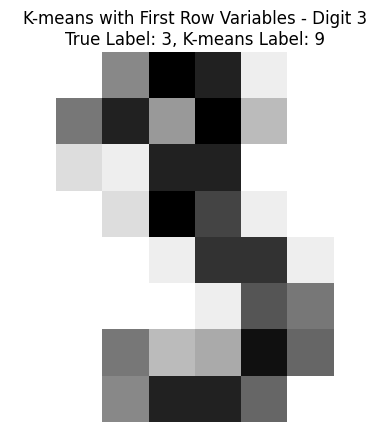

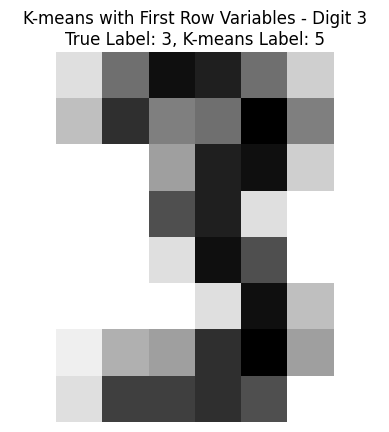

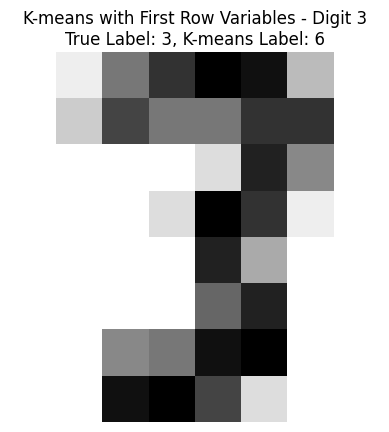

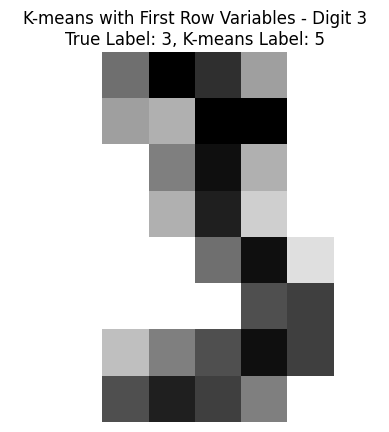

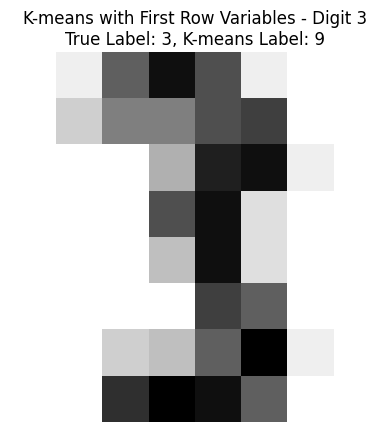

In [106]:
# Function to find multiple indices of a specific digit
def find_indices(label, count):
    indices = np.where(y == label)[0][:count]  # Finding the first 'count' occurrences of the digit
    return indices

# Get 5 indices for digit 3 and digit 1
indices_3 = find_indices(3, 5)
indices_1 = find_indices(1, 5)

# Function to plot multiple examples with original and K-means labels
def plot_multiple_examples(indices, true_digit_label, kmeans_labels, title):
    for index in indices:
        plot_digit_with_labels(digits.images[index], y[index], kmeans_labels[index], title=title)

# Plotting for digit 3 - Step 7 (K-means with First Row Variables vs Original Label)
plot_multiple_examples(indices_3, 3, labels_row, title='K-means with First Row Variables - Digit 3')

# Plotting for digit 1 - Step 7 (K-means with First Row Variables vs Original Label)
# plot_multiple_examples(indices_1, 1, labels_row, title='K-means with First Row Variables - Digit 1')

**K-means with First Row Variables** - *What it Means*: Here, we are using only the first row of pixels from each image, which translates to the first 8 pixels. This dramatically reduces the amount of data and captures only a horizontal slice at the top of the digit. After testing and using the next row of 8 pixels and so on, I saw that the first row didn't cluster correctly at all, the second row didn't cluster correctly either, and the third row kind of saw a pattern and could kind of distringuish certain clusters although not all were the same, which leads me to think that selecting a row of 8 pixels could give us a partially ok result but never stable enough to depend on.


*How Many Data Are We Using:* Only 8 variables (first/second/third row), representing a very limited view of the digit.

*How It Works:*
Using only a signle row means K-means can only “see” a part of the digit, which often contains only a small portion of the digit’s overall structure.The row might contain a curve, part of a line, or even nothing substantial, depending on the digit. This small slice does not provide enough information for K-means to accurately differentiate between digits.



*Why It Does Not Cluster Correctly:*
By focusing only on a row, the algorithm misses critical features found in the rest of the digit, leading to significant misclassifications. Many digits can look similar if only a certain row-part is considered (e.g., digits 1 and 7 might both have little to no strokes in the first row), causing K-means to confuse them.



*Conclusion:* K-means clustering using only a single-row's variables fails because it does not capture enough of the digit’s structure, leading to incorrect groupings based on limited and often misleading features.

# Step8: K-means with variables of one column

In [107]:
# Step 8: K-means with variables of one column (e.g., using the first column of each image)
# Extracting the first column of each image
X_first_col = X[:, ::8]

# Apply K-means clustering on the first column variables
kmeans_col = KMeans(n_clusters=10, random_state=42)
kmeans_col.fit(X_first_col)
labels_col = kmeans_col.labels_

# Analyzing clustering results by comparing with actual labels
conf_matrix_col = confusion_matrix(y, labels_col)

# Display confusion matrix to analyze clustering by columns
conf_matrix_col_df = pd.DataFrame(conf_matrix_col, index=range(10), columns=range(10))
conf_matrix_col_df

#The confusion matrix for K-means clustering using only the first column of each image shows a severe misclassification
  #where most of the digits are clustered into a single group. This result indicates that using only a single column
  #does not provide enough discriminative information to distinguish between digits effectively.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


,0,1,2,3,4,5,6,7,8,9
0,178,0,0,0,0,0,0,0,0,0
1,181,0,0,0,0,0,1,0,0,0
2,174,0,0,0,1,0,0,1,0,1
3,181,0,0,2,0,0,0,0,0,0
4,172,1,2,0,0,5,0,0,1,0
5,181,0,0,1,0,0,0,0,0,0
6,181,0,0,0,0,0,0,0,0,0
7,179,0,0,0,0,0,0,0,0,0
8,171,0,0,1,0,0,0,2,0,0
9,180,0,0,0,0,0,0,0,0,0


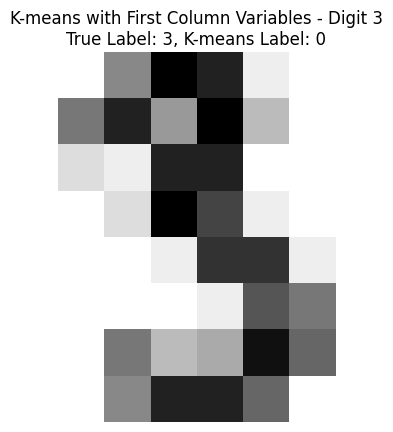

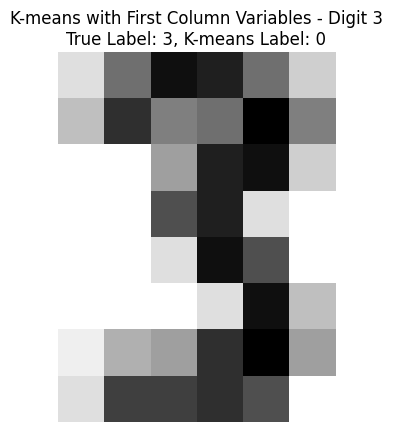

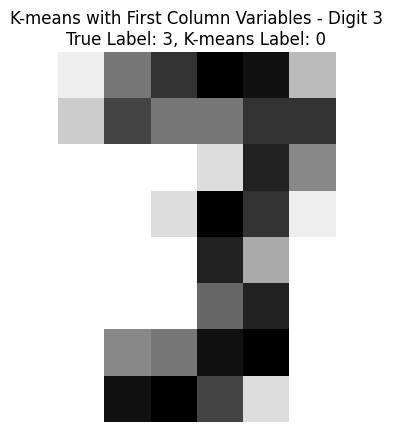

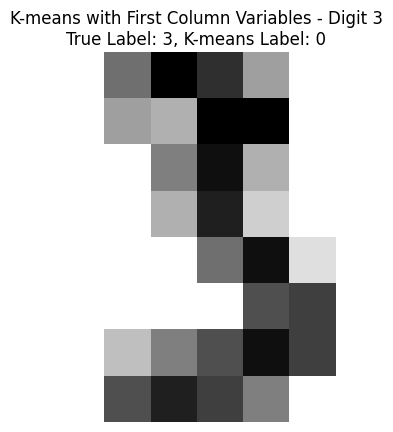

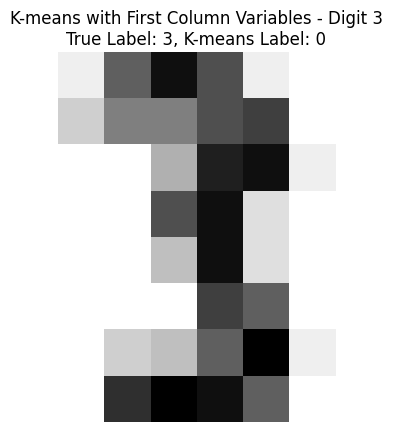

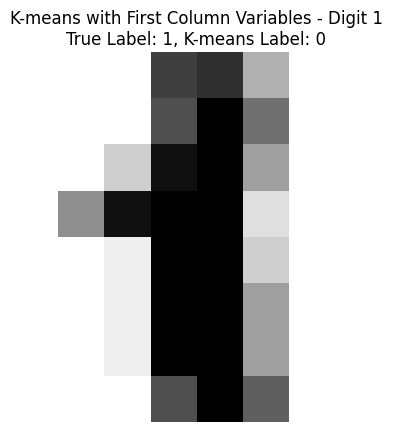

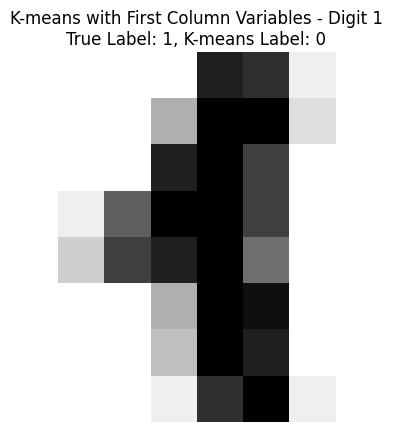

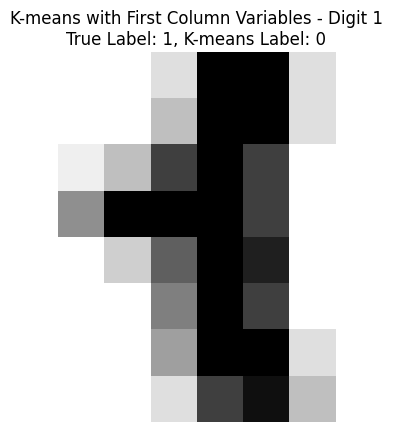

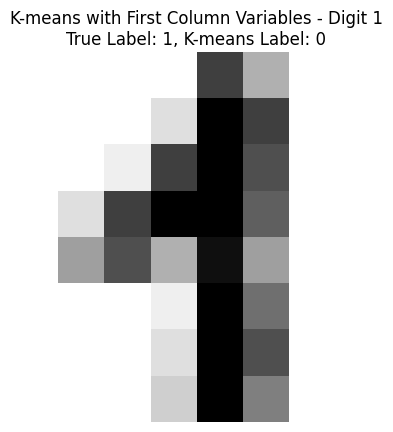

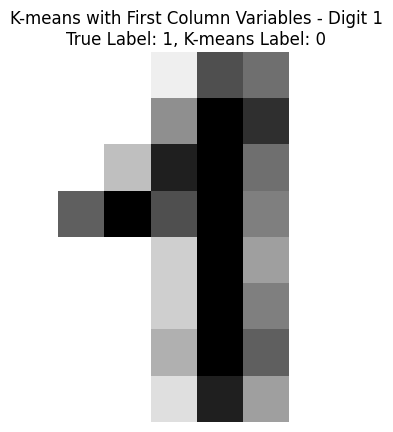

In [108]:
# Function to find multiple indices of a specific digit
def find_indices(label, count):
    indices = np.where(y == label)[0][:count]  # Finding the first 'count' occurrences of the digit
    return indices

# Get 5 indices for digit 3 and digit 1
indices_3 = find_indices(3, 5)
indices_1 = find_indices(1, 5)

# Function to plot multiple examples with original and K-means labels
def plot_multiple_examples(indices, true_digit_label, kmeans_labels, title):
    for index in indices:
        plot_digit_with_labels(digits.images[index], y[index], kmeans_labels[index], title=title)

# Plotting for digit 3 - Step 8 (K-means with First Column Variables vs Original Label)
plot_multiple_examples(indices_3, 3, labels_col, title='K-means with First Column Variables - Digit 3')

# Plotting for digit 1 - Step 8 (K-means with First Column Variables vs Original Label)
plot_multiple_examples(indices_1, 1, labels_col, title='K-means with First Column Variables - Digit 1')


**K-means with First Column Variables** - *What it Means:* This approach uses only a single column of each image, capturing vertical slices of the digit (8 pixels from top to bottom along the leftmost edge and so on).


*How Many Data Are We Using:* Only 8 variables, representing a thin vertical cross-section of the digit.


*How It Works:*
By using only one column, the algorithm captures just a narrow band of the digit, which might represent a vertical stroke, part of a curve, or an empty space. And just like with rows, using a single column provides an incomplete and often misleading representation of the entire digit’s shape. After testing and using the next column of 8 pixels and so on, I saw that the first column didn't cluster correctly at all, the second column didn't cluster correctly either, and the third column kind of saw a pattern and could kind of distringuish certain clusters although not all were the same which leads me to think that selecting a column of 8 pixels could give us a partially ok result but never stable enough to depend on.



*Why It Does Not Cluster Correctly:*
The vertical slice often lacks the key distinguishing features that differentiate digits. For instance, digits 3, 8, and 0 could all have similar vertical sections, making them hard to distinguish when viewed in isolation.
The data is too sparse, capturing only a small part of the digit, leading to high overlap between different digits in the clustering process.


*Conclusion:* K-means with first column variables struggles to correctly group digits because it sees only a narrow part of the digit's structure, leading to confusion between digits that share similar vertical patterns.

# **Conclusion**

This activity demonstrates the impact of data representation on the performance of K-means clustering, particularly when applied to digit recognition using the "digits" dataset from sklearn. Here's a comprehensive conclusion based on the findings from the three steps:

By doing K-Means with all the variables, it provides a comprehensive view, allowing K-means to group similar digits effectively, even if the exact label is off. This is the most reliable approach as it uses the full context of the dataset "digits".


On both methods (rows and columns) with a drastically reduced amount of information available and only being able to capture a limited aspect of each digit, the lack of comprehensive data was obvious since results depended on poor clustering performance, with significant misclassifications because critical distinguishing features are missed.


*Key Takeaways:*


1.   The success of K-means clustering in accurately grouping digits depends on having access to the complete set of pixel data. Limited views (rows or columns) fail to provide the necessary detail for correct identification.
2.   K-means does not inherently assign clusters based on the true numeric label of digits but rather groups data points based on structural similarities. Consistency in clustering across instances of the same digit, even with different cluster labels, indicates effective grouping.
3. Reducing the number of features to only rows or columns exposes the limitations of clustering algorithms when critical contextual information is lost. It underscores the need for careful feature selection and the risks of relying on partial data.



# **Referencias**
*chatgpt.com*